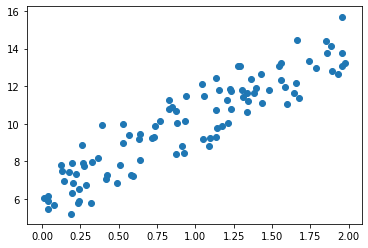

In [1]:
## 경사하강법
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=  = 4x + 6 을 근사(wo = 4, w1 = 6), 임의의 값은 노이즈를 위해 만듦
X = 2*np.random.rand(100,1)
y = 6 + 4*X +np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
## 비용함수 정의
def get_cost(y,y_pred) :
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
## w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

    

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters = 10000) :
    # w1과 w0을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0


In [5]:
def get_cost(y,uy_pred) :
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1 : {0:.3f} w0 : {1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]* X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


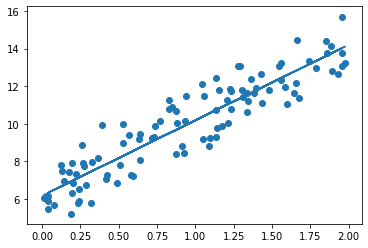

In [6]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [7]:
## 경사하강법은 수행 시간이 매우 길기 때문에
## 대용량의 경우 확률적 경사하강법이나 미니 배치 확률적 경사하강법을 사용한다

## 미니배치 ㄱ ㄱ
def stochastic_gradient_steps(X, y, batch_size = 10, iters = 1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 지정
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_steps(X, y, iters = 1000)
print("w1 : ",round(w1[0,0],3), ",  w0 : ",round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.028 ,  w0 :  6.156
Stochastic Gradient Descent Total Cost : 0.9937


In [9]:
from sklearn.linear_model import LinearRegression
#(fit_intercept = True, nomalize=False, copy_X=True, n_jobs=1)
# class sklearn.linear_model .LinearRegression(fit_intercept = True, nomalize=False, copy_X=True, n_jobs=1)

In [10]:
## 보스턴 주택가격 회귀로
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [11]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns =  boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


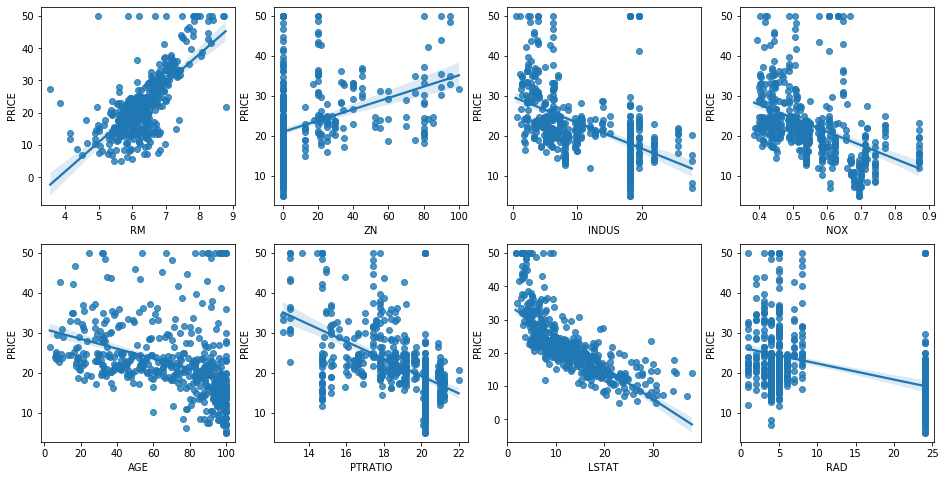

In [13]:
## 각 컬럼들이 회귀 결과에 미치는 영향을 시각화로써 확인해보자
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_feature = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_feature) :
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])##replot: 산점도와 회귀 직선을 함께 표현

In [14]:
## 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.4f}, RMSE : {1:.4f}'.format(mse, rmse)) ## 낮을수록 좋다
print('Variance score : {0:.4f}'.format(r2_score(y_test, y_preds)))

MSE : 17.2969, RMSE : 4.1590
Variance score : 0.7572


In [15]:
print('절편 값 : ',lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_,1))

## y = -0.1x1 + 0.1x2 + 0 + 3x4 ............. + 40.9956


절편 값 :  40.995595172164336
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
## 큰 값 순으로 정렬
# print(X_data.columns)
coeff = pd.Series(data=np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

## nox의 음의 회귀 계수는 값이 너무 크기 때문에 최적화 수행을 하면서 피처 coefficients의 변화를 봐야한다

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

##사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대합니다. 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수를 사용합니다. 이런 이유로 앞선 코드에서 제곱근을 계산하기 전에 -scores로 부호를 바꿨습니다

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# 5
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 부정 MSE score : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE score : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {:.4f}'.format(avg_rmse))

5 folds의 개별 부정 MSE score :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE score :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.8287


In [18]:
#### 다항회귀
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n',X )

# degree = 2인 2차 다항식을 변환하기 위해 import한거 이용해서 변환 [x1,x2] -> [1,x1,x2,x1^2,x1x2,x2^2]
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 ## y = 1 +2x1 + 3x1^2 + 4x2^3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y) # 5 = 1 + 0 + 0 + 4         125 = 1 + 4 + 12 + 108

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [20]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 : \n', poly_ftr)

# 선형회귀에 3차 다항식 계수, 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape :' , model.coef_.shape)

3차 다항식 계수 : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


In [21]:
from sklearn.pipeline import Pipeline


## pipeline을 사용하여 다항회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법

def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [22]:
## 차수가 높아질수록 과적합의 문제가 발생
## pass

In [23]:
## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
## 비용 함수 목표 = min(rss + 알파*W) 
## 알파 : 학습데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 부정 MSE score : ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE score : ', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE : {:.4f}'.format(avg_rmse))

5 folds의 개별 부정 MSE score :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE score :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.5182


In [25]:
# alpha값을 0, 0.1, 1, 10, 100, 1000변화시키면서 rmse 관찰
alphas = [0, 0.1, 1, 10, 100, 1000]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))
    

alpha 0일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds 의 평균 RMSE : 5.788
alpha 1일 때 5 folds 의 평균 RMSE : 5.653
alpha 10일 때 5 folds 의 평균 RMSE : 5.518
alpha 100일 때 5 folds 의 평균 RMSE : 5.330
alpha 1000일 때 5 folds 의 평균 RMSE : 5.598


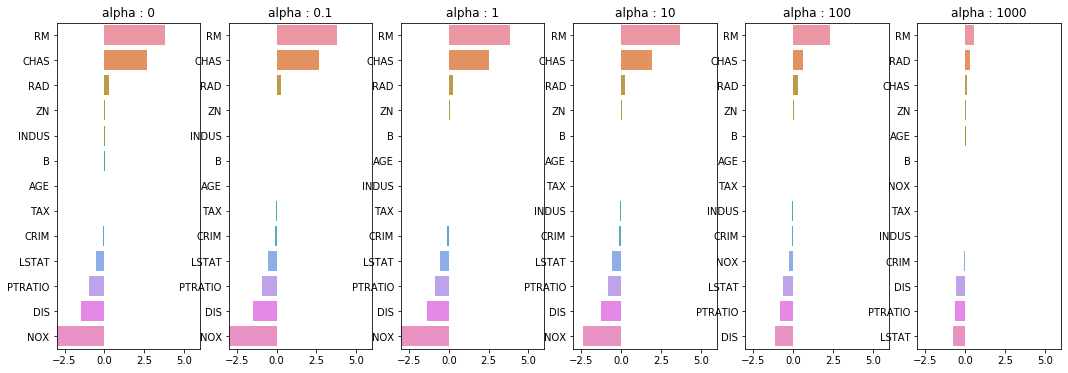

In [26]:
## 알파값의 변화에 따른 피처의 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 6)
## 각 알파값에 따른 회귀 계수 값을 데이터로 저장하기 위해 데프 생성
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    ## 막대그래프로 각 알파값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [27]:
ridge_alphas = [0, 0.1, 1, 10, 100, 1000]
sort_column = 'alpha : ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100,alpha : 1000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721


In [28]:
## 라쏘
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True) :
    coeff_df = pd.DataFrame()
    if verbose : 
        print('#######', model_name, '#######')
    
    for param in params :
        if model_name == 'Ridge' : 
            model = Ridge(alpha = param)
        elif model_name == 'Lasso' : 
            model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' :
            model = ElasticNet(alpha = param, l1_ratio = 0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 folds 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        ## cross_val_score는 eval metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        
        ## alpha에 따른 피처별 회귀 계수를 Series로 변환, df컬럼으로 추가
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff
    
    return coeff_df

lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.07일 때 5 folds 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 folds 세트의 평균 RMSE : 5.669
alpha 1일 때 5 folds 세트의 평균 RMSE : 5.776
alpha 3일 때 5 folds 세트의 평균 RMSE : 6.189


In [29]:
sort_column = 'alpha : ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [30]:
## 비용 함수 목표 = min(rss + 알파1*W  + 알파2*W) 
## 알파1/(알파1+알파2)

elastic_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### ElasticNet #######
alpha 0.07일 때 5 folds 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 folds 세트의 평균 RMSE : 5.467
alpha 1일 때 5 folds 세트의 평균 RMSE : 5.597
alpha 3일 때 5 folds 세트의 평균 RMSE : 6.068


In [31]:
sort_column = 'alpha : ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [32]:
########################## 선형 회귀 모델을 위한 데이터 변환
## 보스턴 주택 가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓/최솟값 정규화, 로그 변환을 차례로 적용한 후 rmse로 각 경우 별 예측 성능 측정

# p_degree는 다항식 특성을 추가할때 적용. 2이상 부여X
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def get_scaled_data(method = 'None', p_degree= None, input_data = None) :
    if method == "Standard" :
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax" :
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log" : ## 일반적으로 로그함수를 적용하면 언더플로우가 발생하기 쉬워서 1+log() 적용
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
        
    if p_degree != None :
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias = False).fit_transform(scaled_data)
        
    return scaled_data

In [33]:
# 논논 스논 스2 민맥논 민맥2 로그논
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods :
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree=scale_method[1], input_data = X_data)
    
    print('\n 변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval("Ridge", params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False )


 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.788
alpha 1일 때 5 folds 세트의 평균 RMSE : 5.653
alpha 10일 때 5 folds 세트의 평균 RMSE : 5.518
alpha 100일 때 5 folds 세트의 평균 RMSE : 5.330

 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.826
alpha 1일 때 5 folds 세트의 평균 RMSE : 5.803
alpha 10일 때 5 folds 세트의 평균 RMSE : 5.637
alpha 100일 때 5 folds 세트의 평균 RMSE : 5.421

 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 8.827
alpha 1일 때 5 folds 세트의 평균 RMSE : 6.871
alpha 10일 때 5 folds 세트의 평균 RMSE : 5.485
alpha 100일 때 5 folds 세트의 평균 RMSE : 4.634

 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.764
alpha 1일 때 5 folds 세트의 평균 RMSE : 5.465
alpha 10일 때 5 folds 세트의 평균 RMSE : 5.754
alpha 100일 때 5 folds 세트의 평균 RMSE : 7.635

 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 folds 세트의 평균 RMSE : 5.298
alpha 1일 때 5 folds 세트의 평균 RMSE : 4.323
alpha 10일 때 5 folds 세트의 평균 RMSE : 5.185
alpha 100일 때 5 folds 세트의 

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
# 평균0 분산1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test =train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('정확도 : {:.4}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:.4}'.format(roc_auc_score(y_test, lr_preds)))

정확도 : 0.9766
roc_auc : 0.9716


In [35]:
bike = pd.read_csv('./bike.csv')
bike.head()

bike['datetime'] = bike.datetime.apply(pd.to_datetime)

bike['year'] = bike.datetime.apply(lambda x : x.year)
bike['month'] = bike.datetime.apply(lambda x : x.month)
bike['day'] = bike.datetime.apply(lambda x : x.day)
bike['hour'] = bike.datetime.apply(lambda x : x.hour)

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [36]:
drop_columns = ['datetime', 'casual', 'registered']
bike.drop(drop_columns, axis = 1, inplace = True)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y, pred) :
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse( y, pred) :
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [41]:
def rmsle(y, pred) :
    msle = mean_squared_error(y, pred)
    rmsle = np.sqrt(mse)
    return rmsle

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike['count']
X_features = bike.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 4.159, RMSE: 140.900, MAE: 105.924


      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


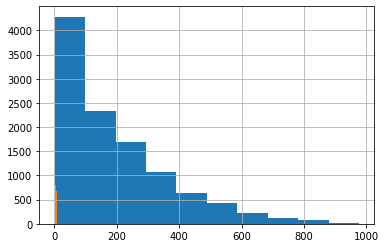

In [43]:
def get_top_error_data(y_test, pred, n_tops= 5) :
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

y_target.hist()

y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [44]:
y_target_log = np.log1p(y_target)

X_train, x_test, t_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(pred)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)


RMSLE: 4.159, RMSE: 0.000, MAE: 0.000


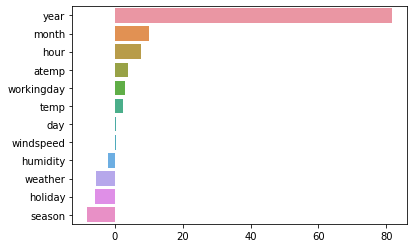

In [45]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y= coef_sort.index)

### LinearRegression ###
RMSLE: 4.159, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 4.159, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 4.159, RMSE: 113.219, MAE: 72.803


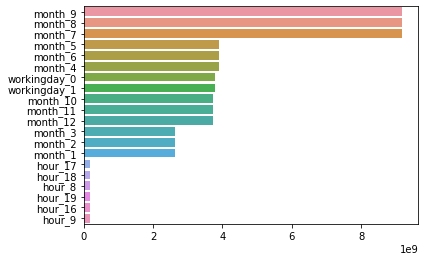

In [46]:
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)


for model in [lr_reg, ridge_reg, lasso_reg] :
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)
    
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [47]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for modle in [rf_reg,gbm_reg,xgb_reg,lgbm_reg] :
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values,is_expm1 = True)

### Lasso ###
RMSLE: 4.159, RMSE: 113.219, MAE: 72.803
### Lasso ###
RMSLE: 4.159, RMSE: 113.219, MAE: 72.803
### Lasso ###
RMSLE: 4.159, RMSE: 113.219, MAE: 72.803
### Lasso ###
RMSLE: 4.159, RMSE: 113.219, MAE: 72.803


In [ ]:
## binning기법